In [237]:
# 라이브러리 import
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import warnings
sns.set(font="Malgun Gothic")
warnings.filterwarnings('ignore')
from scipy.stats import kruskal
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

# 0. 데이터 불러오기

In [2]:
data=pd.read_csv(os.listdir()[5],encoding='EUC-KR')
data=data.query('합계!=0')

# 시각화 함수, 빈도 테이블 생성, 통계 검정

In [3]:
#빈도테이블 생성
def count(x):
    data1=pd.DataFrame(x.value_counts()).reset_index()
    data1.columns=['category','빈도수']
    return data1

In [4]:
#barplot
def bargraph(x,y,x_label,y_label,figsize1,figsize2,data):
    plt.figure(figsize=(figsize1, figsize2))
    if data[x].dtypes=='int64':
        data[x]=data[x].astype('str')
    data=data.sort_values(by=y,ascending=False).reset_index()
    
    for index, row in data.iterrows():
        g=sns.barplot(x,y,data=data)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        g.text(index,row[y],row[y],color='black',ha='center')

In [23]:
#파이차트
def pie_chart(x, y, data, figsize1, figsize2):
    plt.figure(figsize=(figsize1, figsize2))
    length = len(data)
    my_list = [0.05] * length
    plt.pie(y,
            labels=x,
            autopct='%.f%%',
            startangle=90,
            counterclock=True,
            shadow=True,
            explode=my_list 
           )
    plt.show()

In [203]:
#비모수 검정
def Kruskal_wallis(x,y,data): #x그룹화할 변수, y검정할 연속형 변수 등
    grouped=data.groupby(x)
    for i,group in grouped:
        groups = [group[y].tolist() for _, group in grouped] 
    result=kruskal(*groups) #* 메소드로 그룹화 풀어서 리스트별 적용
    
    if result.pvalue <0.05:
        print(f'p-value가 유의수준 0.05 보다 작기 때문에 {x}별의 {y}의 차이가 없다는 귀무가설은 기각됩니다. {x}간의 {y}차이는 유의미합니다')
    else:
        print('{x}별 {y}의 차이는 유의미하지 않습니다')
        
    if result.pvalue < 0.05:
        print(f'{x}별 {y}의 차이를 시각적으로 확인합니다')
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=data,x=x,y=y)
    else:
        pass

In [204]:
def Anova_test(x,y,data):
    grouped=data.groupby(x)
    for i, group in grouped:
        groups=[group[y].tolist() for _,group in grouped]
    f_statistic, p_value=f_oneway(*groups)
    if p_value < 0.05:
        print(f'p-value가 유의수준 0.05 보다 작기 때문에 {x}별의 {y}의 차이가 없다는 귀무가설은 기각됩니다. {x}간의 {y}차이는 유의미합니다')
    else:
        print('{x}별 {y}의 차이는 유의미하지 않습니다')
        
    if p_value < 0.05:
        print(f'{x}별 {y}의 차이를 시각적으로 확인합니다')
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=data,x=x,y=y)
    else:
        pass

In [241]:
def T_test(x,y,data):
    grouped=data.groupby(x)
    for i,group in grouped:
        groups = [group[y].tolist() for _, group in grouped] 
    t_statistic, p_value = stats.ttest_ind(*groups,equal_var=True)
    if p_value < 0.05:
        print(f'p-value가 유의수준 0.05 보다 작기 때문에 {x}별의 {y}의 차이가 없다는 귀무가설은 기각됩니다. {x}간의 {y}차이는 유의미합니다')
    else:
        print('{x}별 {y}의 차이는 유의미하지 않습니다')
    if p_value < 0.05:
        print(f'{x}별 {y}의 차이를 시각적으로 확인합니다')
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=data,x=x,y=y)
    else:
        pass

# 1. 기술통계량

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12449 entries, 0 to 12542
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   비고          12449 non-null  int64  
 1   지자체명_시도     12449 non-null  object 
 2   지자체명_시군구    12449 non-null  object 
 3   구분          12449 non-null  object 
 4   농업경영체       12449 non-null  int64  
 5   합계          12449 non-null  int64  
 6   작물 종류       12449 non-null  object 
 7   배정신청 인원     12449 non-null  int64  
 8   지자체추가배정인원   12449 non-null  int64  
 9   농지면적(실제경작)  12449 non-null  float64
 10  전년대비농경체증감률  12449 non-null  float64
 11  고령농경체비율     12449 non-null  float64
 12  전년도이탈인원     12449 non-null  float64
 13  전년도활용여부     12449 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.4+ MB


In [7]:
round(data[['배정신청 인원','지자체추가배정인원','농지면적(실제경작)','전년대비농경체증감률','고령농경체비율','전년도이탈인원']].describe(),3)

,배정신청 인원,지자체추가배정인원,농지면적(실제경작),전년대비농경체증감률,고령농경체비율,전년도이탈인원
count,12449.000,12449.000,12449.000,12449.000,12449.000,12449.000
mean,3.362,0.033,0.496,102.359,53.464,0.092
std,2.027,0.289,0.594,0.999,4.310,0.511
min,0.000,-2.000,0.000,99.500,39.370,0.000
25%,2.000,0.000,0.250,101.800,51.030,0.000
50%,3.000,0.000,0.360,102.300,53.630,0.000
75%,5.000,0.000,0.550,103.000,56.230,0.000
max,12.000,9.000,22.090,107.500,63.720,11.000


# 2. 개별 변수 시각화

In [8]:
data.head(5)

,비고,지자체명_시도,지자체명_시군구,구분,농업경영체,합계,작물 종류,배정신청 인원,지자체추가배정인원,농지면적(실제경작),전년대비농경체증감률,고령농경체비율,전년도이탈인원,전년도활용여부
0,2022,강원도,춘천시,중농,1000000327,3,① 시설원예·특작,3,0,0.40,101.5,49.39,0.0,N
1,2022,강원도,춘천시,중농,1000000332,4,① 시설원예·특작,4,0,0.37,101.5,49.39,0.0,N
2,2023,강원도,춘천시,중농,1000000332,2,① 시설원예·특작,2,0,0.37,102.5,51.68,0.0,Y
3,2022,강원도,춘천시,대농,1000000336,3,① 시설원예·특작,3,0,0.73,101.5,49.39,0.0,N
4,2023,강원도,춘천시,대농,1000000336,6,① 시설원예·특작,6,0,0.73,102.5,51.68,0.0,Y


# 연도별 신청 경영체 수

In [9]:
data1=count(data['비고'])

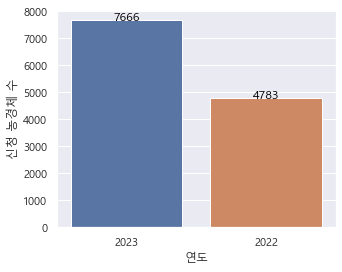

In [10]:
bargraph('category','빈도수','연도','신청 농경체 수',5,4,data1)

# 시도별 신청현황

In [11]:
data1=count(data['지자체명_시도'])

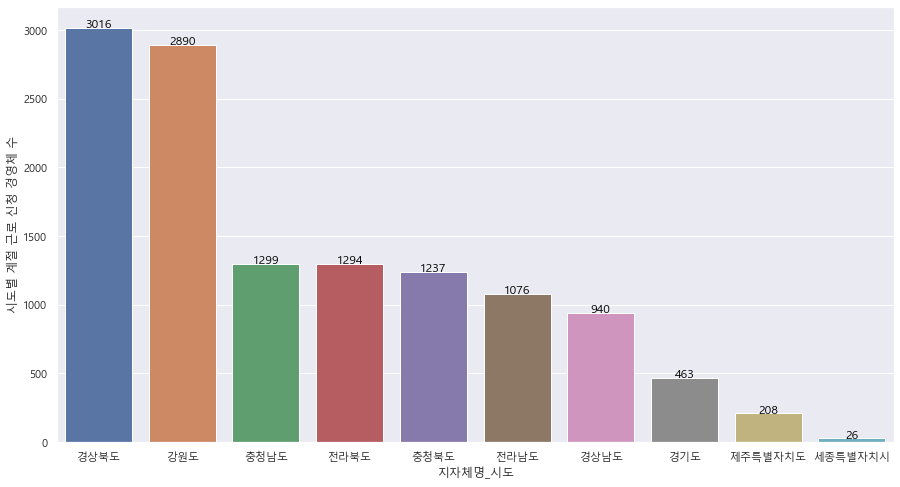

In [12]:
bargraph('category','빈도수','지자체명_시도','시도별 계절 근로 신청 경영체 수',15,8,data1)

# 2022년 시도별 현황

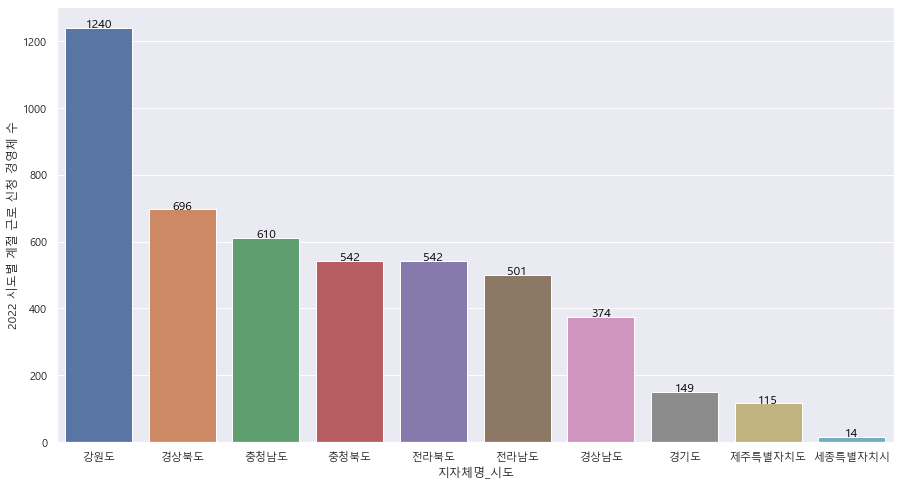

In [13]:
data_2022=data.query('비고==2022')
data1=count(data_2022['지자체명_시도'])
bargraph('category','빈도수','지자체명_시도','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

# 2023년 시도별 현황

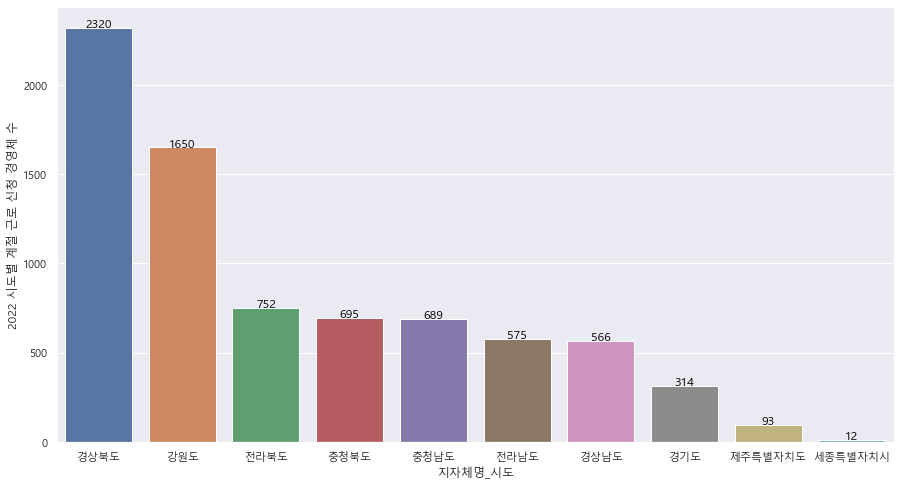

In [14]:
data_2023=data.query('비고==2023')
data1=count(data_2023['지자체명_시도'])
bargraph('category','빈도수','지자체명_시도','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

# 경상북도 현황

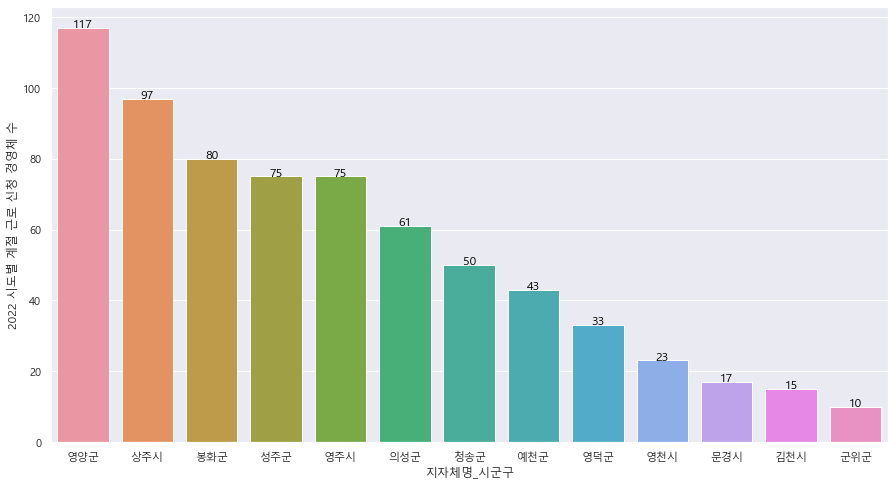

In [15]:
data_2022_경북=data_2022[data_2022['지자체명_시도']=='경상북도']
data1=count(data_2022_경북['지자체명_시군구'])
bargraph('category','빈도수','지자체명_시군구','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

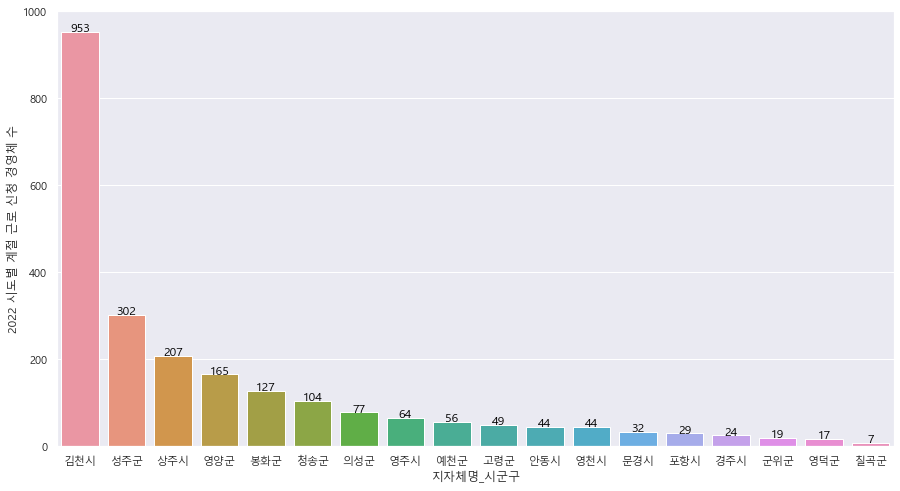

In [16]:
data_2023_경북=data_2023[data_2023['지자체명_시도']=='경상북도']
data1=count(data_2023_경북['지자체명_시군구'])
bargraph('category','빈도수','지자체명_시군구','2022 시도별 계절 근로 신청 경영체 수',15,8,data1)

# 연도별 현황_추가변수

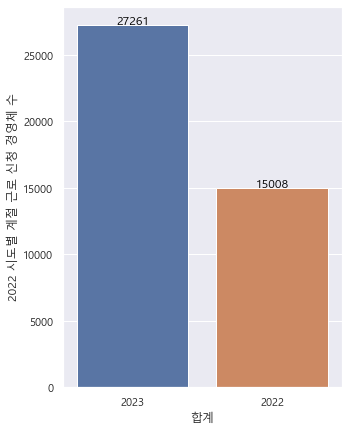

In [17]:
sum_of_apply=data.groupby('비고').sum().reset_index()
bargraph('비고','합계','합계','2022 시도별 계절 근로 신청 경영체 수',5,7,sum_of_apply)

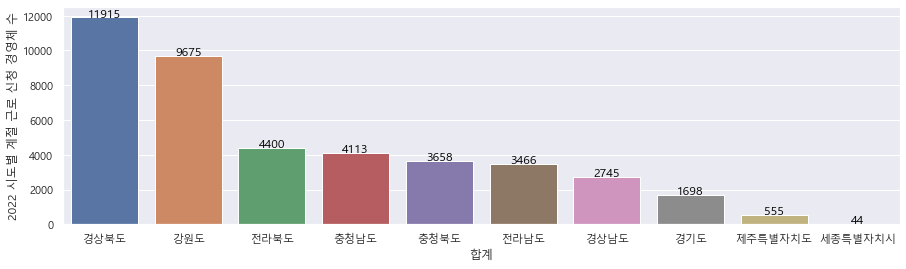

In [18]:
sum_of_apply=data.groupby('지자체명_시도').sum('합계').reset_index()
bargraph('지자체명_시도','합계','합계','2022 시도별 계절 근로 신청 경영체 수',15,4,sum_of_apply)

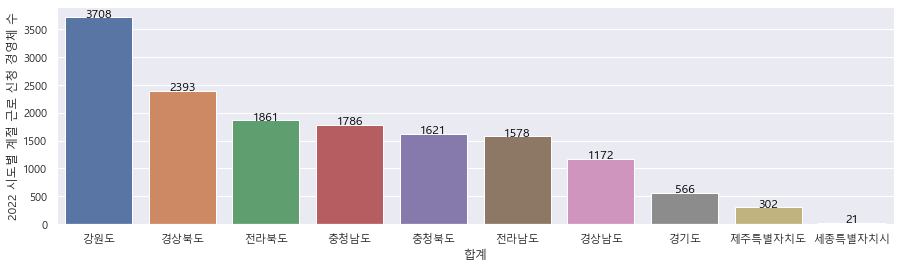

In [19]:
sum_of_apply=data_2022.groupby('지자체명_시도').sum('합계').reset_index()
bargraph('지자체명_시도','합계','합계','2022 시도별 계절 근로 신청 경영체 수',15,4,sum_of_apply)

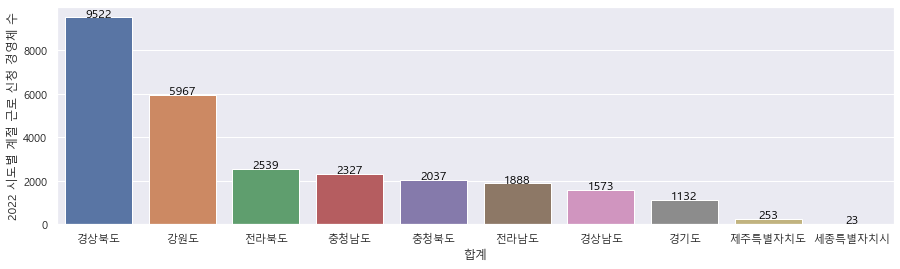

In [20]:
sum_of_apply=data_2023.groupby('지자체명_시도').sum('합계').reset_index()
bargraph('지자체명_시도','합계','합계','2022 시도별 계절 근로 신청 경영체 수',15,4,sum_of_apply)

# 개별 변수 탐색-파이차트

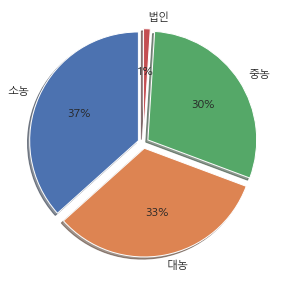

In [44]:
data1=count(data['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(data1['category'],data1['비율'],data=data1,figsize1=5,figsize2=5)

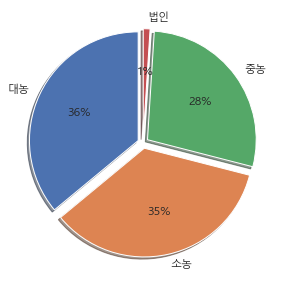

In [43]:
data1=count(data_2022['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(data1['category'],data1['비율'],data=data1,figsize1=5,figsize2=5)

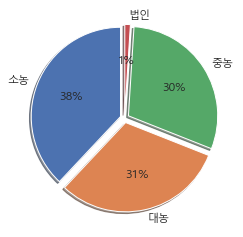

In [42]:
data1=count(data_2023['구분'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(data1['category'],data1['비율'],data=data1,figsize1=4,figsize2=5)

In [50]:
def pie_chart(x, y, data, figsize1, figsize2):
    plt.figure(figsize=(figsize1, figsize2))
    length = len(data)
    my_list = [0.05] * length
    plt.pie(y,
            labels=x,
            autopct='%.f%%',
            startangle=90,
            counterclock=True,
            shadow=True,
            explode=my_list 
           )
    plt.show()

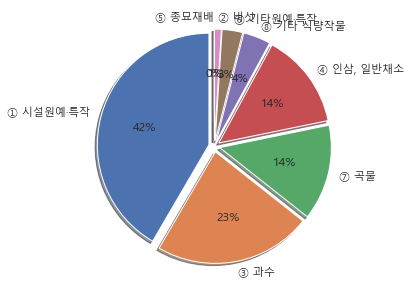

In [51]:
data1=count(data['작물 종류'])
data1['비율']=round((data1['빈도수']/sum(data1['빈도수'])),2)
pie_chart(x=data1['category'],y=data1['비율'],data=data1,figsize1=5,figsize2=10)

# 통계적 검정

- Kruskal Wallis 검정
- Anova 검정
- duncan 검정(아노바 사후검정)
- Boxplot

# 비모수 검정

p-value가 유의수준 0.05 보다 작기 때문에 작물 종류별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 작물 종류간의 합계차이는 유의미합니다
작물 종류별 합계의 차이를 시각적으로 확인합니다


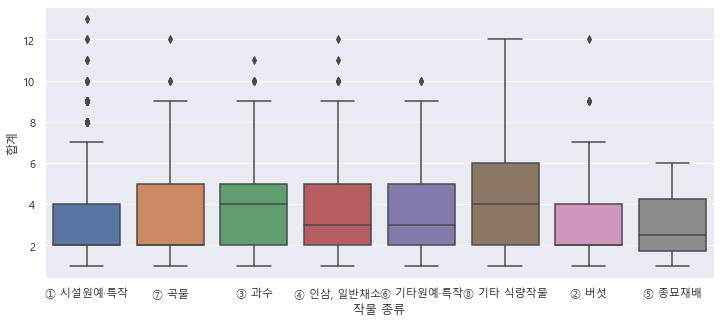

In [205]:
Kruskal_wallis('작물 종류','합계',data)

p-value가 유의수준 0.05 보다 작기 때문에 구분별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 구분간의 합계차이는 유의미합니다
구분별 합계의 차이를 시각적으로 확인합니다


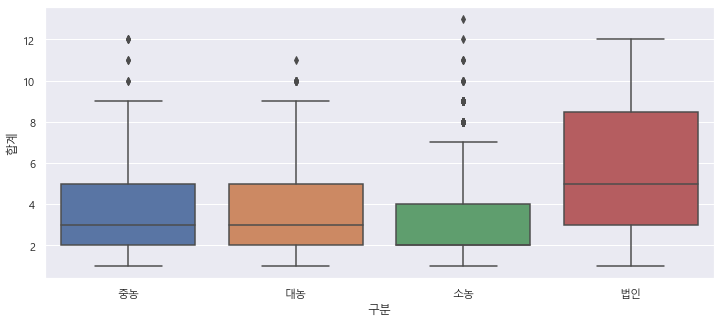

In [206]:
Kruskal_wallis('구분','합계',data)

# 모수 검정(Anova 검정)

p-value가 유의수준 0.05 보다 작기 때문에 작물 종류별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 작물 종류간의 합계차이는 유의미합니다
작물 종류별 합계의 차이를 시각적으로 확인합니다


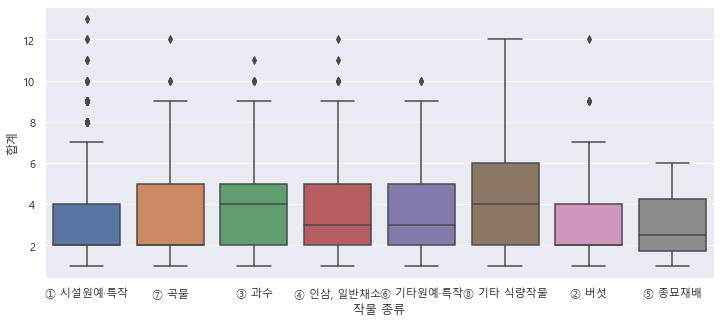

In [211]:
Anova_test('작물 종류','합계',data)

# 모수 검정(T-test 검정)

p-value가 유의수준 0.05 보다 작기 때문에 전년도활용여부별의 합계의 차이가 없다는 귀무가설은 기각됩니다. 전년도활용여부간의 합계차이는 유의미합니다
전년도활용여부별 합계의 차이를 시각적으로 확인합니다


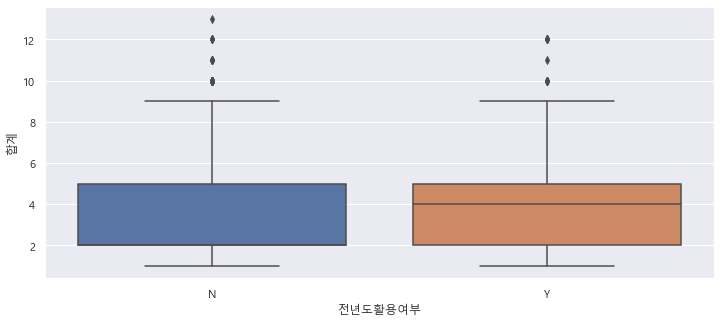

In [242]:
T_test('전년도활용여부','합계',data=data)